<a href="https://colab.research.google.com/github/1989-juliana-h/hello-world/blob/master/KI_Management_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook zum Einstieg in die Explorative Datenanalyse

In [ ]:
%pip install pandas ## Sie müssen am Anfang immer die Pakete aktivieren oder auch installieren, die Sie benötigen, Pandas benötigen Sie eigentlich immer
## % nennt sich "Magic Function" und lädt Pakete im Notebook und nicht auf ihren Rechner (der typische Weg ist über die Kommandozeile pip install pandas einzugeben)
# '#' können Sie nutzen um "auszukommentieren" für zum Beispiel Notizen oder wenn Sie einen Befehl aktuell nicht ausführen wollen

In [1]:
import pandas as pd

In [2]:
# Wenn Sie Colab nutzen, müssen Sie die Daten in Ihren Colab Ordner legen und eine Verbindung mit Ihrem Google Drive herstellen
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd ## nutze ich hier wieder, um zu zeigen, für was welches Paket benötigt wird (reicht sonst 1x am Anfang des Notebooks)

# Load the sales data from the "Colab Notebooks" folder in Google Drive
try:
    sales_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/view_de_sample.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'view_de_sample.csv' not found in '/content/drive/My Drive/Colab Notebooks/'. Please check the file name and path.")
    sales_df = None # Ensure sales_df is defined even if file loading fails

Data loaded successfully!


In [4]:
sales_df.head()

,Unnamed: 0,date,avg_price,sales,black_friday,corona_cases,email_sendouts,influencer_reach,google_trend,tv_brand_grp,tv_sale_grp,pla_clicks,seanb_clicks,seanb_impressions,youtube_non_sale_impressions,youtube_sale_impressions,daily_mean_air_temperature,social_brand_impressions,social_performance_impressions,social_retargeting_impressions
0,1,2017-01-01,90,22788,0,0,0,0.0,9.66,0.0,0.0,8510,56362,0,0,0,-1.44,39660,0,0
1,2,2017-01-02,93,29305,0,0,0,0.0,9.02,0.0,0.0,15076,94066,0,0,0,-0.64,61529,243014,0
2,3,2017-01-03,93,37425,0,0,0,0.0,12.54,0.0,0.0,22398,106556,0,0,0,1.76,41269,279438,0
3,4,2017-01-04,92,48540,0,0,0,0.0,11.22,0.0,0.0,25226,159906,0,0,0,2.14,39667,330282,0
4,5,2017-01-05,93,41448,0,0,0,0.0,10.34,0.0,0.0,21062,158788,0,0,0,-3.26,112531,609416,0


In [5]:
# If an 'Unnamed: 0' column exists, you can drop it
if 'Unnamed: 0' in sales_df.columns:
    sales_df = sales_df.drop('Unnamed: 0', axis=1)

# Rename the actual date column to 'date'
# Replace 'actual_date_column_name' with the actual name of your date column
# You can check the column names with sales_df.columns if unsure
sales_df = sales_df.rename(columns={'actual_date_column_name': 'date'})


# Convert the 'date' column to datetime objects
# errors='coerce' will turn unparseable dates into NaT (Not a Time)
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')

# Display the first few rows and the data types to confirm the changes
display(sales_df.head())
print("\nData types after processing date column:")

,date,avg_price,sales,black_friday,corona_cases,email_sendouts,influencer_reach,google_trend,tv_brand_grp,tv_sale_grp,pla_clicks,seanb_clicks,seanb_impressions,youtube_non_sale_impressions,youtube_sale_impressions,daily_mean_air_temperature,social_brand_impressions,social_performance_impressions,social_retargeting_impressions
0,2017-01-01,90,22788,0,0,0,0.0,9.66,0.0,0.0,8510,56362,0,0,0,-1.44,39660,0,0
1,2017-01-02,93,29305,0,0,0,0.0,9.02,0.0,0.0,15076,94066,0,0,0,-0.64,61529,243014,0
2,2017-01-03,93,37425,0,0,0,0.0,12.54,0.0,0.0,22398,106556,0,0,0,1.76,41269,279438,0
3,2017-01-04,92,48540,0,0,0,0.0,11.22,0.0,0.0,25226,159906,0,0,0,2.14,39667,330282,0
4,2017-01-05,93,41448,0,0,0,0.0,10.34,0.0,0.0,21062,158788,0,0,0,-3.26,112531,609416,0



Data types after processing date column:


In [6]:
sales_df.describe()

,date,avg_price,sales,black_friday,corona_cases,email_sendouts,influencer_reach,google_trend,tv_brand_grp,tv_sale_grp,pla_clicks,seanb_clicks,seanb_impressions,youtube_non_sale_impressions,youtube_sale_impressions,daily_mean_air_temperature,social_brand_impressions,social_performance_impressions,social_retargeting_impressions
count,1773,1773.000000,1.773000e+03,1773.000000,1773.000000,1.773000e+03,1.773000e+03,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1.773000e+03,1.773000e+03,1.773000e+03,1773.000000,1.773000e+03,1.773000e+03,1.773000e+03
mean,2019-06-06 00:00:00,74.413988,2.206196e+05,0.009024,2716.399887,3.970774e+04,1.789713e+05,20.291117,10.652298,6.542605,112692.223350,125960.485054,4.943169e+05,5.111309e+05,5.212734e+05,10.243447,5.113051e+05,2.640287e+06,3.596853e+06
min,2017-01-01 00:00:00,51.000000,2.278800e+04,0.000000,-554.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-9.440000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-03-20 00:00:00,68.000000,1.230520e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,13.160000,0.000000,0.000000,56584.000000,77586.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000,1.206600e+05,1.459046e+06,5.949980e+05
50%,2019-06-06 00:00:00,74.000000,1.870880e+05,0.000000,0.000000,1.577900e+04,0.000000e+00,19.110000,0.000000,0.000000,110854.000000,114330.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.944680,2.445110e+05,2.193706e+06,3.707190e+06
75%,2020-08-22 00:00:00,81.000000,2.860920e+05,0.000000,1314.000000,5.398500e+04,8.871200e+04,26.130000,12.992080,0.000000,159812.000000,167894.000000,1.143320e+06,3.982600e+04,0.000000e+00,16.540000,5.559560e+05,3.168556e+06,5.409048e+06
max,2021-11-08 00:00:00,103.000000,1.274385e+06,1.000000,45333.000000,2.401914e+06,1.708671e+07,79.000000,169.932120,222.545040,464718.000000,517940.000000,5.554350e+06,2.739808e+07,7.574444e+07,27.940000,1.426094e+07,1.904900e+07,1.441569e+07
std,NaN,8.693558,1.345192e+05,0.094593,6368.206631,8.528375e+04,9.253701e+05,10.703421,21.562760,24.580358,69291.295204,68257.987122,7.448993e+05,1.686696e+06,2.680795e+06,7.300603,8.601358e+05,2.113927e+06,2.682246e+06


In [7]:
## Gibt die Spaltennamen untereinander aus, nicht zwingend notwendig
for i in sales_df.columns:
  print(i)

date
avg_price
sales
black_friday
corona_cases
email_sendouts
influencer_reach
google_trend
tv_brand_grp
tv_sale_grp
pla_clicks
seanb_clicks
seanb_impressions
youtube_non_sale_impressions
youtube_sale_impressions
daily_mean_air_temperature
social_brand_impressions
social_performance_impressions
social_retargeting_impressions


In [8]:
## Auswahl einer kleineren Menge Daten
#selected_columns = ['date','sales', 'avg_price', 'black_friday', 'corona_cases'] ## wenn man zum Beispiel nicht mit allen Daten arbeiten möchte

#new_df = sales_df[selected_columns].copy()

## ich möchte mit allen Daten weiterarbeiten. Hierfür kopiere ich den Originaldatensatz. Wenn ihr verhindern wollt, dass Veränderungen am neuen Datensatz zu Veränderungen am alten führen macht folgendes:
new_df = sales_df.copy(deep = True)

display(new_df.head())

## Wichtig: bei date Spalten immer darauf achten: 1. Wurde das Format korrekt übernommen?, 2. Wurde die Spalte als date formatiert? 3. In welchem Format brauche ich das Date?

,date,avg_price,sales,black_friday,corona_cases,email_sendouts,influencer_reach,google_trend,tv_brand_grp,tv_sale_grp,pla_clicks,seanb_clicks,seanb_impressions,youtube_non_sale_impressions,youtube_sale_impressions,daily_mean_air_temperature,social_brand_impressions,social_performance_impressions,social_retargeting_impressions
0,2017-01-01,90,22788,0,0,0,0.0,9.66,0.0,0.0,8510,56362,0,0,0,-1.44,39660,0,0
1,2017-01-02,93,29305,0,0,0,0.0,9.02,0.0,0.0,15076,94066,0,0,0,-0.64,61529,243014,0
2,2017-01-03,93,37425,0,0,0,0.0,12.54,0.0,0.0,22398,106556,0,0,0,1.76,41269,279438,0
3,2017-01-04,92,48540,0,0,0,0.0,11.22,0.0,0.0,25226,159906,0,0,0,2.14,39667,330282,0
4,2017-01-05,93,41448,0,0,0,0.0,10.34,0.0,0.0,21062,158788,0,0,0,-3.26,112531,609416,0


## Übersichten, Zusammenfassungen und Form des Datensatzes testen

In [9]:
new_df.shape ## 17 spalten, 1773 zeilen

(1773, 19)

In [10]:
new_df.dtypes ## gibt die Datentypen aus

## int = ganze Zahlen ohne Nachkommastellen (3, 4, 5, 6 ...)
## float = Kommazahl mit Nachkommastellen
## 64 = Bits / Speicher
## Was kann ich machen, wenn ich etwas umformatieren möchte, also den Datentyp ändern möchte? Aufpassen, dass alle Beobachtungen vom Datentyp akzeptiert werden
## .astype()

,0
date,datetime64[ns]
avg_price,int64
sales,int64
black_friday,int64
corona_cases,int64
email_sendouts,int64
influencer_reach,float64
google_trend,float64
tv_brand_grp,float64
tv_sale_grp,float64


In [11]:
new_df[new_df.duplicated()] ## gibt es Duplikate? Sind die sinnvoll, oder sollte es diese nicht geben?

,date,avg_price,sales,black_friday,corona_cases,email_sendouts,influencer_reach,google_trend,tv_brand_grp,tv_sale_grp,pla_clicks,seanb_clicks,seanb_impressions,youtube_non_sale_impressions,youtube_sale_impressions,daily_mean_air_temperature,social_brand_impressions,social_performance_impressions,social_retargeting_impressions


In [12]:
new_df.isna().sum() ## gibt es Missing Values? Was sind Missing Values? Oder in der IT Sprache: NAs?

## Eine Möglichkeit ist es Missing Values zu löschen, entweder Beobachtungen oder ganze Spalten, wenn wir zu viele Missings haben, sowas sollten Sie immer sehr doll abwägen!:
## # Remove rows with any missing values
###df_cleaned_rows = new_df.dropna()

# Remove columns with any missing values
###df_cleaned_cols = new_df.dropna(axis=1)

## Eine weitere Möglichkeit ist es Zahlen nachträglich zu ergänzen, auch hier gilt Vorsicht, da dies auch Datenmanipulation darstellen kann und Sie manuell Daten ändern:
# Fill missing values with a specific value (e.g., 0)
##df_filled_zero = new_df.fillna(0) ## auffüllen mit 0 wird zb häufig bei Zeitreihendaten im eCommerce gemacht. Wenn Sie keine Werte haben, wird häufig von 0 ausgegangen, zum Beispiel bei den Verkaufszahlen.

# Fill missing values with the mean of the column
##df_filled_mean = new_df.fillna(new_df.mean())

# Fill missing values with the median of the column
## df_filled_median = new_df.fillna(new_df.median())

,0
date,0
avg_price,0
sales,0
black_friday,0
corona_cases,0
email_sendouts,0
influencer_reach,0
google_trend,0
tv_brand_grp,0
tv_sale_grp,0


In [13]:
new_df.isna().sum().sum() # number of missing cells
round(new_df.isna().sum().sum() / new_df.size * 100, 1) # percentage of missing cells

np.float64(0.0)

In [ ]:
## Wichtigste Einstiegsbefehl ist sich eine Zusammenfassung anzeigen zu lassen: Welche Werte haben die Spalten, sind die plausibel, oder gab es Fehler beim Einlesen der Daten?
## Hier sollte man vor allem darauf achten, ob bei Zahlen . und , nicht verwechselt werden
## Es kann sein, dass Sie nicht nur nummerische Variablen haben, dann kann folgender Befehl hilfreich sein:
## df.describe(include='object')
## tatsächlich gibt es auch Pakete in Python, die die EDA komplett übernehmen --> z.B. ydata-profiling
## from ydata_profiling import ProfileReport
## https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6

In [14]:
new_df.describe()

,date,avg_price,sales,black_friday,corona_cases,email_sendouts,influencer_reach,google_trend,tv_brand_grp,tv_sale_grp,pla_clicks,seanb_clicks,seanb_impressions,youtube_non_sale_impressions,youtube_sale_impressions,daily_mean_air_temperature,social_brand_impressions,social_performance_impressions,social_retargeting_impressions
count,1773,1773.000000,1.773000e+03,1773.000000,1773.000000,1.773000e+03,1.773000e+03,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1.773000e+03,1.773000e+03,1.773000e+03,1773.000000,1.773000e+03,1.773000e+03,1.773000e+03
mean,2019-06-06 00:00:00,74.413988,2.206196e+05,0.009024,2716.399887,3.970774e+04,1.789713e+05,20.291117,10.652298,6.542605,112692.223350,125960.485054,4.943169e+05,5.111309e+05,5.212734e+05,10.243447,5.113051e+05,2.640287e+06,3.596853e+06
min,2017-01-01 00:00:00,51.000000,2.278800e+04,0.000000,-554.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-9.440000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-03-20 00:00:00,68.000000,1.230520e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,13.160000,0.000000,0.000000,56584.000000,77586.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000,1.206600e+05,1.459046e+06,5.949980e+05
50%,2019-06-06 00:00:00,74.000000,1.870880e+05,0.000000,0.000000,1.577900e+04,0.000000e+00,19.110000,0.000000,0.000000,110854.000000,114330.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.944680,2.445110e+05,2.193706e+06,3.707190e+06
75%,2020-08-22 00:00:00,81.000000,2.860920e+05,0.000000,1314.000000,5.398500e+04,8.871200e+04,26.130000,12.992080,0.000000,159812.000000,167894.000000,1.143320e+06,3.982600e+04,0.000000e+00,16.540000,5.559560e+05,3.168556e+06,5.409048e+06
max,2021-11-08 00:00:00,103.000000,1.274385e+06,1.000000,45333.000000,2.401914e+06,1.708671e+07,79.000000,169.932120,222.545040,464718.000000,517940.000000,5.554350e+06,2.739808e+07,7.574444e+07,27.940000,1.426094e+07,1.904900e+07,1.441569e+07
std,NaN,8.693558,1.345192e+05,0.094593,6368.206631,8.528375e+04,9.253701e+05,10.703421,21.562760,24.580358,69291.295204,68257.987122,7.448993e+05,1.686696e+06,2.680795e+06,7.300603,8.601358e+05,2.113927e+06,2.682246e+06


In [15]:
# Anzeigen nur des Heads eines Datensatzes, kann ebenfalls hilfreich sein
new_df.head() ## new_df.tail() zeigt das Ende des Datensatzes

,date,avg_price,sales,black_friday,corona_cases,email_sendouts,influencer_reach,google_trend,tv_brand_grp,tv_sale_grp,pla_clicks,seanb_clicks,seanb_impressions,youtube_non_sale_impressions,youtube_sale_impressions,daily_mean_air_temperature,social_brand_impressions,social_performance_impressions,social_retargeting_impressions
0,2017-01-01,90,22788,0,0,0,0.0,9.66,0.0,0.0,8510,56362,0,0,0,-1.44,39660,0,0
1,2017-01-02,93,29305,0,0,0,0.0,9.02,0.0,0.0,15076,94066,0,0,0,-0.64,61529,243014,0
2,2017-01-03,93,37425,0,0,0,0.0,12.54,0.0,0.0,22398,106556,0,0,0,1.76,41269,279438,0
3,2017-01-04,92,48540,0,0,0,0.0,11.22,0.0,0.0,25226,159906,0,0,0,2.14,39667,330282,0
4,2017-01-05,93,41448,0,0,0,0.0,10.34,0.0,0.0,21062,158788,0,0,0,-3.26,112531,609416,0


In [16]:
new_df.info() ## kann ebenfalls ein hilfreicher Befehl sein, ersetzt df.shape() und df.dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            1773 non-null   datetime64[ns]
 1   avg_price                       1773 non-null   int64         
 2   sales                           1773 non-null   int64         
 3   black_friday                    1773 non-null   int64         
 4   corona_cases                    1773 non-null   int64         
 5   email_sendouts                  1773 non-null   int64         
 6   influencer_reach                1773 non-null   float64       
 7   google_trend                    1773 non-null   float64       
 8   tv_brand_grp                    1773 non-null   float64       
 9   tv_sale_grp                     1773 non-null   float64       
 10  pla_clicks                      1773 non-null   int64         
 11  sean

In [17]:
## Wenn mich eine ganz spezielle Spalte interessiert und wie viele verschiedene Ausprägungen sie hat kann ich folgendes tun:
new_df.sales.nunique()

1765

Variablen Analysen - Welche Variablen / Features sind wichtig? / Sind sie in der Form, in der wir sie brauchen?

## Unterscheidung in Univariate Analyse versus Multivariate Analyse


In [18]:
## Die Tabelle oben gibt Ihnen bereits Hinweise auf die Verteilungen der Variablen und gibt Indikatoren für Ausreißer / Outlier in den Daten
## hier kann man sich auch mit .describe() nur einzelne Spalten ausgeben lassen, oder zum Beispiel ein Histogram verwenden
## eine gute Möglichkeit ohne Visualierung wäre die Interquartile Range (IQR) zu berechnen und zu schauen wie viele Datenpunkte außerhalb dieser Range liegen

### Visualisierung Boxplot mit seaborn Paket
## zunächste notwendige Pakete laden
import seaborn as sns ## Visualisierungspaket
import matplotlib.pyplot as plt ## Standardvisualisierungspaket in Python
import numpy as np ## Numpy ist ein Paket zur Verarbeitung von Datentypen, ins. Array Operationen


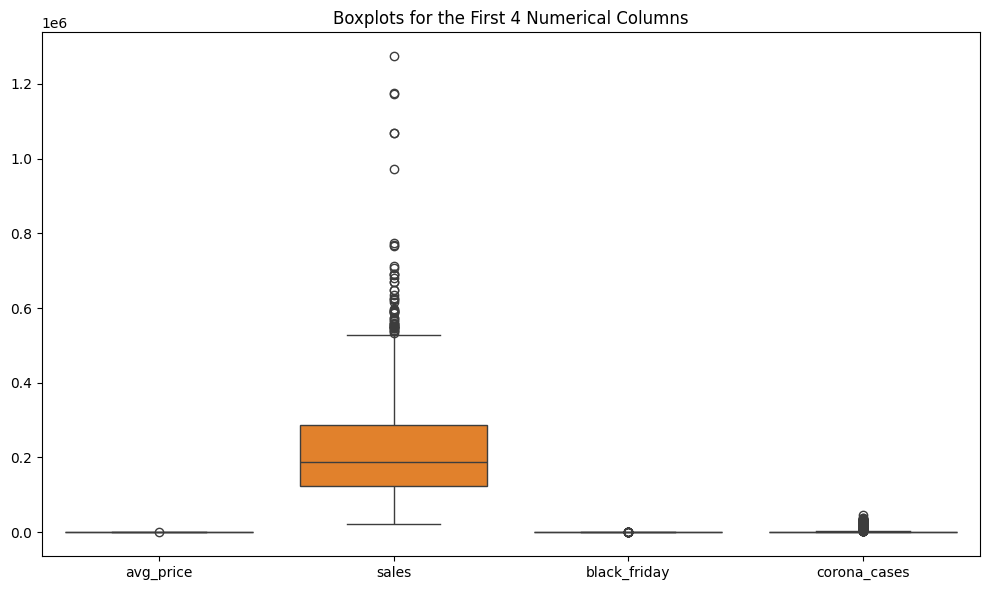

In [19]:
## Was fällt Ihnen auf, was würden Sie anders machen?

# Select only numerical columns for boxplots
numerical_cols = new_df.select_dtypes(include=np.number).columns

# Select only the first 4 numerical columns
selected_numerical_cols = numerical_cols[:4]

# Create boxplots for the selected numerical columns
plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# Use seaborn.boxplot with the selected columns and specify orientation
sns.boxplot(data=new_df[selected_numerical_cols], orient='v')

plt.title('Boxplots for the First 4 Numerical Columns')
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

<Axes: >

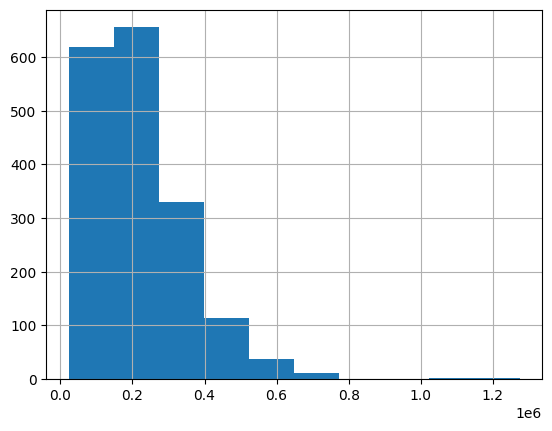

In [20]:
## Hilfreich können auch Histogramme sein, wie sieht eigentlich die Verteilung aus, ist die schief? Habe ich normalverteilte Daten?
new_df.sales.hist()

Was sind weitere hilfeiche univariate Visualisierungen?

In [ ]:
## 1. Reine Plots / Bar plots, zum Beispiel für kategorische Variablen
## df.column_name.plot(kind=’bar’)  ## Befehl um sich einen Barplot ausgeben zu lassen --> Vorsicht: Daten müssen erst aggregiert wird

## 2. Für Zeitreihen können Linienplots sehr hilfreich sein, um sich den Verlauf über die Zeit anzuschauen!
## df.column_name.plot(kind=’line’)

## 3. Was sind gute Visualisierungen von Text, um ein Gefühl zu bekommen?
## bei Text und Kategorien würde ein BarPlot gehen,oder auch ein Pie Chart
## bei reinen Text Variablen bietet sich beispielsweise eine WordCloud an


<Axes: xlabel='date'>

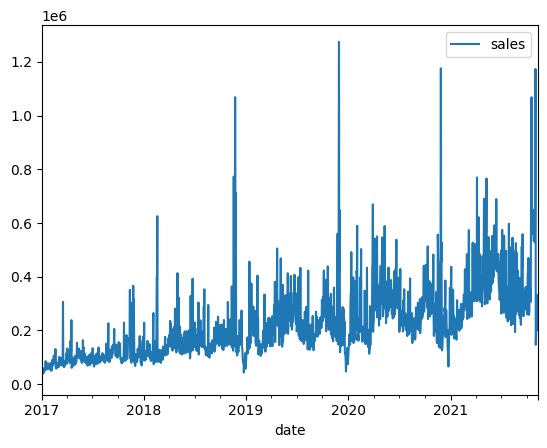

In [22]:
new_df.plot(x="date", y="sales", kind="line")

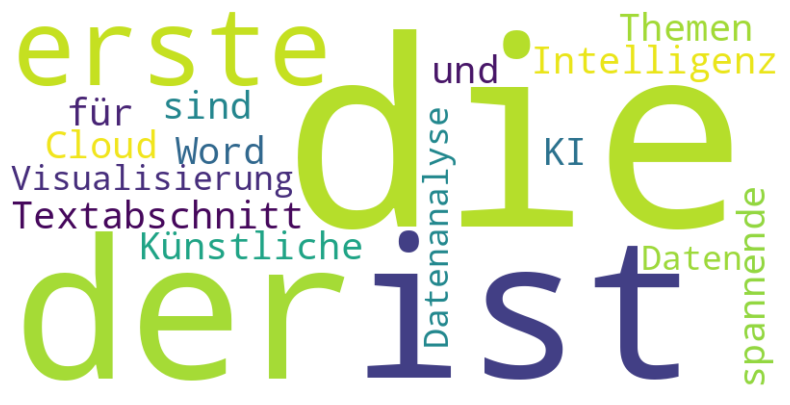

In [ ]:
## Beispiel WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example text data as a list (replace with your list or pandas Series of texts)
text_list = [
    "Dies ist der erste Textabschnitt für die Word Cloud.",
    "KI und Künstliche Intelligenz sind spannende Themen.",
    "Visualisierung, Daten, Datenanalyse."
]

# Join the list of texts into a single string
text = " ".join(text_list)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated Word Cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Remove axes
plt.show()

## Multivariate Analysen

In [ ]:
## Häufig interessiert uns nicht nur wie Variablen / Features ansich verteilt sind, sondern wie sie im Zusammenhang zueinander stehen

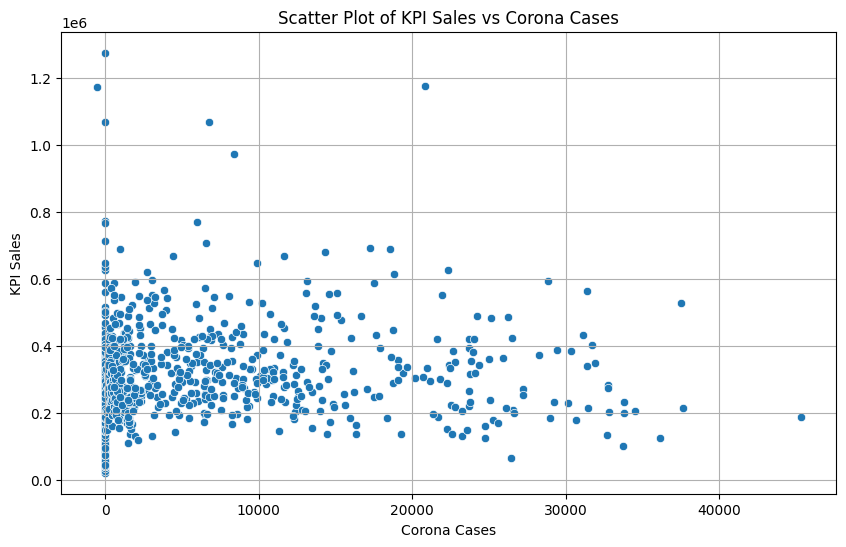

In [24]:
import seaborn as sns ## sie müssen nicht immer wieder Pakete importieren, am Anfang des Notebooks reicht, ist nur zu Illustrationszwecken
import matplotlib.pyplot as plt

# Create a scatter plot of kpi_sales vs corona_cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='corona_cases', y='sales')

plt.title('Scatter Plot of KPI Sales vs Corona Cases')
plt.xlabel('Corona Cases')
plt.ylabel('KPI Sales')
plt.grid(True)
plt.show()

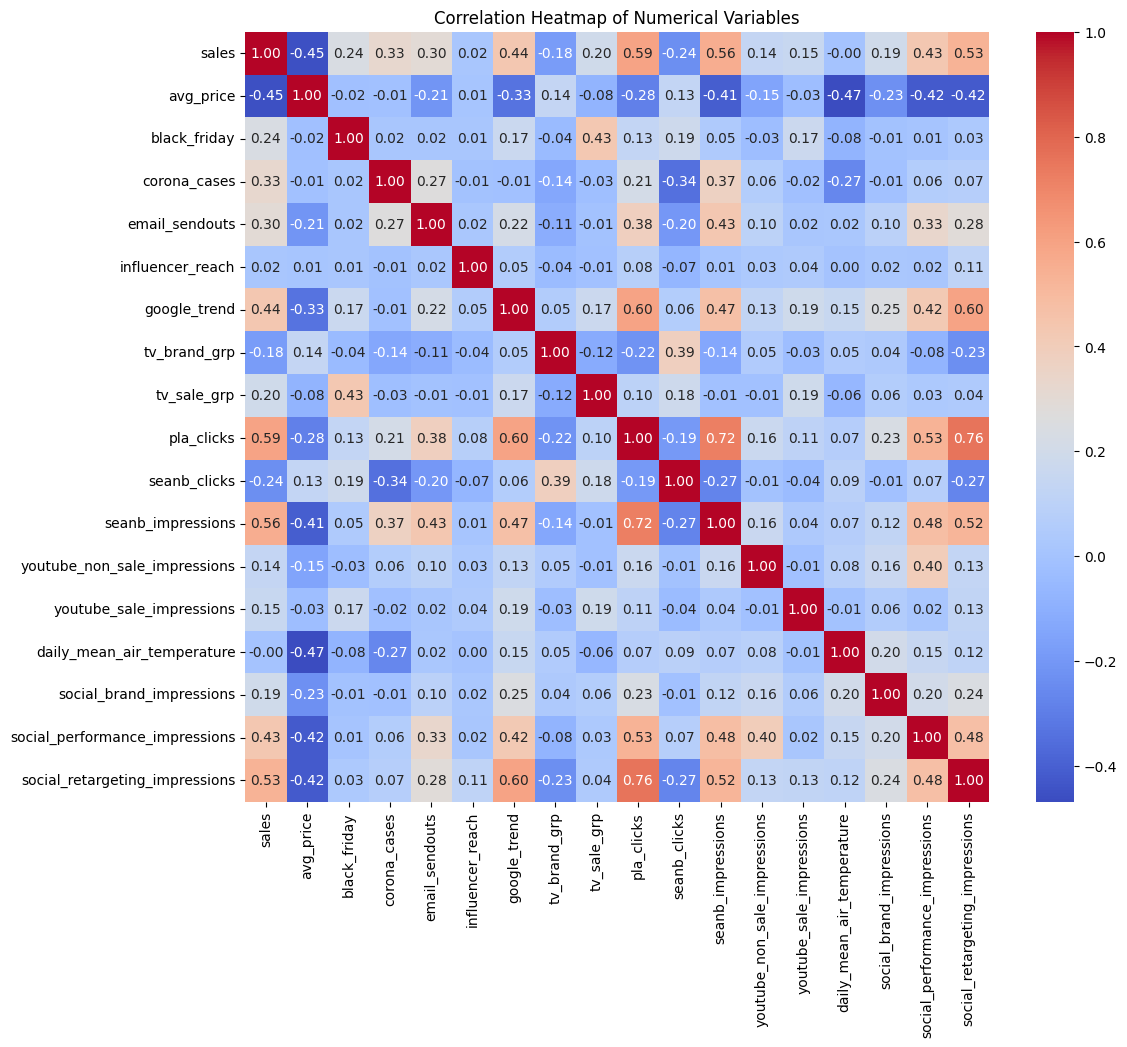

In [25]:
## Wichtig für die Analyse von numerischen Variablen sind immer Korrelationen; hiermit teste ich ob ein linearer Zusammenhang zwischen Features / Variablen besteht
## Wichtig, hierbei handelt es sich nicht um einen gerichteten Zusammenhang, sondern lediglich um einen linearen Zusammenhang

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numerical_cols = new_df.select_dtypes(include=np.number).columns.tolist()

# Ensure 'sales' is the first column if it exists
if 'sales' in numerical_cols:
    numerical_cols.remove('sales')
    numerical_cols.insert(0, 'sales')

# Calculate the correlation matrix
correlation_matrix = new_df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## hier kann man sich die Farben frei ausgeben lassen, die Nachkommastellen und kann auch bestimmte Korrelationen ausblenden lassen!

## Weitere Besonderheiten und Tipps

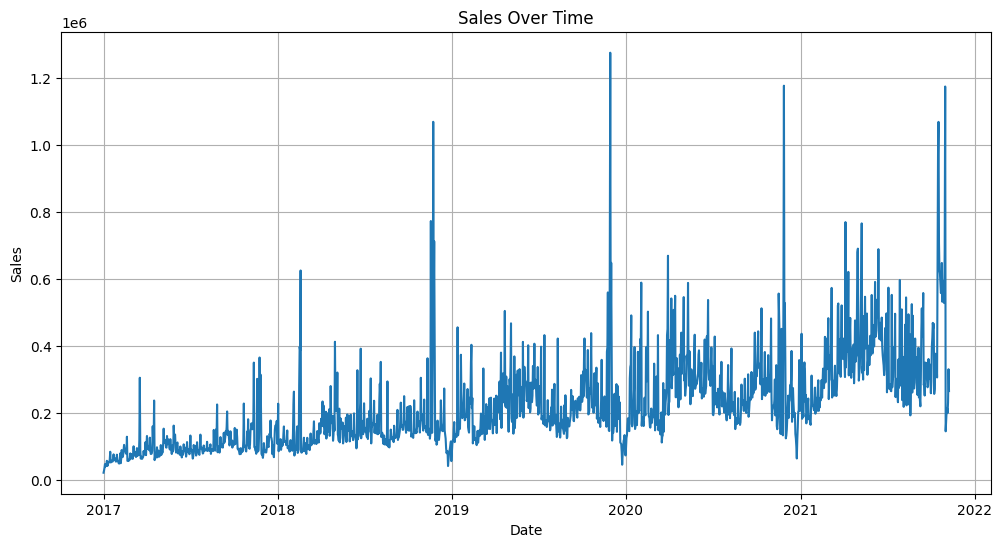

In [26]:
## Zum Beispiel gibt es bei Zeitreihen viele Besonderheiten. Wir sollten uns anschauen, ob es einen Trend gibt, ob wir Muster erkennen und ob wir zum Beispiele neue Variablen aufnehmen sollte, die diese Muster abbilden

# Convert 'date' column to datetime objects if it's not already
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Sort the DataFrame by date (optional but good practice for time series plots)
sales_df.sort_values(by='date', inplace=True)

# Plot the time series for kpi_sales using 'date' for the x-axis
plt.figure(figsize=(12, 6))
plt.plot(sales_df['date'], sales_df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## hier schaue ich mir jetzt an, was fällt mir auf? Wo muss ich reinzoomen?
## Positiver Trend sichtbar: Sollten wir also davon ausgehen, die Sales sind gestiegen wegen eines Grundwachstums, dies sollte in einem ML Modell berückscithigt werden
## Wie berücksichtigen wir einen ganz simplen linearen Trend? Wir integrieren eine Variable, die hochzählt, z.B. 1, 2, 3, 4, 5 etc.
## Wenn wir reinzoomen können wir uns Tagessaisonalität, andere Saisonalitäten und Muster anschauen, für die wir vielleicht eine Variable benötigen


In [ ]:
## was kann ich jetzt machen, um reinzuzoomen?
## wir können ein tolles Paket benutzen, das ploty heißt und Visualisierungen interaktiv macht!

In [27]:
import plotly.express as px

# Assuming sales_df is already loaded and contains 'date' and 'kpi_sales' columns

# Convert 'date' column to datetime objects if it's not already
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Create an interactive time series plot using Plotly Express
fig = px.line(sales_df, x='date', y='sales', title='Sales Over Time (Interactive)')

# Show the plot
fig.show()

### Frage: Welche weiteren Variablen würden Sie einbauen?

In [ ]:
## Vorschlag weitere Features aus der Datumsvariable

## Zum Beispiel das Jahr
new_df['Jahr'] = new_df.date.dt.year

## Oder der Monat
new_df['Monat'] = new_df.date.dt.month ## schauen Sie hinterher ob Sie die Variable numerisch oder One-Hot Encoded nutzen wollen

### Weitere Ideen: Tag, Day of Week


In [7]:
import statsmodels.api as sm

# Define the dependent and independent variables
y = sales_df['sales']
X = sales_df['corona_cases']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     213.3
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           1.04e-45
Time:                        15:37:34   Log-Likelihood:                -23353.
No. Observations:                1773   AIC:                         4.671e+04
Df Residuals:                    1771   BIC:                         4.672e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.018e+05   3282.254     61.484   